<a href="https://colab.research.google.com/github/AnnieCRY/DS5500-Project2/blob/master/pet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EDA on Pet Characteristics dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_144588_337971_cat_breed_characteristics.csv to datasets_144588_337971_cat_breed_characteristics.csv
Saving datasets_144588_337971_dog_breed_characteristics.csv to datasets_144588_337971_dog_breed_characteristics.csv
Saving kaggle.json to kaggle.json


In [170]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [ ]:
df_cat = pd.read_csv("/content/datasets_144588_337971_cat_breed_characteristics.csv")
df_dog = pd.read_csv("/content/datasets_144588_337971_dog_breed_characteristics.csv")

In [ ]:
print(len(df_cat))
print(len(df_dog))

67
250


## select columns we are interested

In [ ]:

cols = ['BreedName','AltBreedName','Fur','MaleWtKg','Temperment','AvgKittenPrice','PopularityUS2017']
dog_cols = ['BreedName','AltBreedName','MaleWtKg','Temperment','AvgPupPrice','PopularityUS2017','Group1','Group2','Intelligence']
df_cat = df_cat.loc[:,cols] 
df_dog = df_dog.loc[:,dog_cols] 

## Most popular dogs and cats in 2017

In [ ]:
df_cat[['PopularityUS2017']] = df_cat[["PopularityUS2017"]].apply(pd.to_numeric)
df_cat.sort_values(by=['PopularityUS2017'], inplace=True, ascending=True)
df_cat[df_cat['PopularityUS2017']<6].loc[:,['BreedName','PopularityUS2017']]

,BreedName,PopularityUS2017
27,Exotic Shorthair,1.0
44,Persian,2.0
35,Maine Coon,3.0
47,Ragdoll,4.0
10,British Shorthair,5.0


In [ ]:
df_dog[['PopularityUS2017']] = df_dog[["PopularityUS2017"]].apply(pd.to_numeric)
df_dog.sort_values(by=['PopularityUS2017'], inplace=True, ascending=True)
df_dog[df_dog['PopularityUS2017']<6].loc[:,['BreedName','PopularityUS2017']]

,BreedName,PopularityUS2017
247,Yellow Labrador Retriever,1.0
64,Chocolate Labrador Retriever,1.0
31,Black Labrador Retriever,1.0
143,Labrador Retriever,1.0
209,Shepherd,2.0
105,German Shepherd Dog,2.0
242,White German Shepherd,2.0
192,Retriever,3.0
111,Golden Retriever,3.0
102,French Bulldog,4.0


## Distribution graphs of column data



### Cats

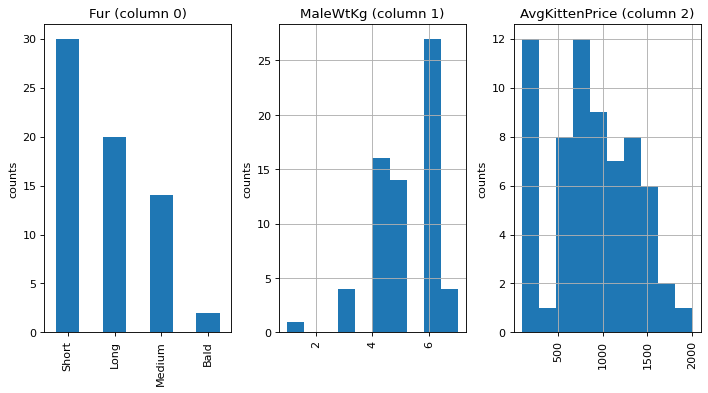

In [ ]:
def plotPerColumnDistribution(df, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (3 * nGraphPerRow, 3* nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(nCol):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df_cat[['Fur','MaleWtKg','AvgKittenPrice']], 3)

### Dogs

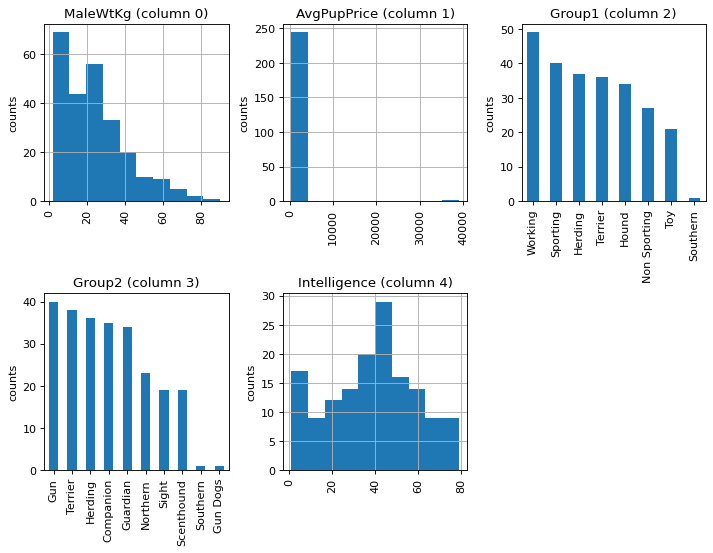

In [ ]:

plotPerColumnDistribution(df_dog[['MaleWtKg','AvgPupPrice','Group1','Group2','Intelligence']], 3)

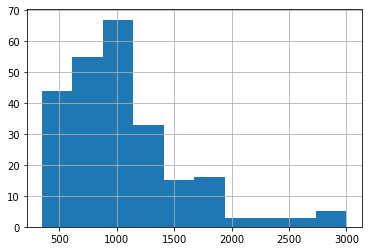

In [ ]:
def plotColumnDistribution(df, col):
  if isinstance(df[col][0], float):
    df[col].hist()
  else:
    df[col].value_counts().plot(kind='bar')
plotColumnDistribution(df_dog[df_dog["AvgPupPrice"]<10000],"AvgPupPrice")

In [ ]:
# Most and least intelligent dogs
df_dog.sort_values(by=['Intelligence'], inplace=True, ascending=True)
df_dog[df_dog['Intelligence']<4].loc[:,['BreedName','Intelligence']]

,BreedName,Intelligence
39,Border Collie,1.0
184,Toy Poodle,2.0
183,Miniature Poodle,2.0
181,Poodle,2.0
182,Standard Poodle,2.0
209,Shepherd,3.0
105,German Shepherd Dog,3.0
242,White German Shepherd,3.0


In [ ]:
df_dog.sort_values(by=['Intelligence'], inplace=True, ascending=False)
df_dog.loc[:,['BreedName','Intelligence']].head(3)

,BreedName,Intelligence
1,Afghan Hound,79.0
18,Basenji,78.0
84,English Bulldog,77.0


## Generate information for a breed

In [ ]:
def infoTable(df,breed):
  l=breed.strip().lower().split()
  breed=""
  for w in l:
    breed+=w.capitalize()+" " 
  breed = breed.strip()
  if df[df['BreedName']==breed].empty and df[df['AltBreedName']==breed].empty:
    print("no information of "+breed+" found.")
    return df[df['BreedName']==breed].T
  elif df[df['BreedName']==breed].empty:
    return df[df['AltBreedName']==breed].T
  else:
    return df[df['BreedName']==breed].T

infoTable(df_dog,' boRder collie ')

,39
BreedName,Border Collie
AltBreedName,NaN
MaleWtKg,17
Temperment,"Intelligent, Energetic, Alert, Responsive, Ten..."
AvgPupPrice,700
PopularityUS2017,38
Group1,Herding
Group2,Herding
Intelligence,1


In [ ]:
infoTable(df_dog,'leonb erger')

no information of Leonb Erger found.


""
BreedName
AltBreedName
MaleWtKg
Temperment
AvgPupPrice
PopularityUS2017
Group1
Group2
Intelligence


# EDA on Oxford-IIIT Pet Dataset


We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds.

## load data from fast.ai

**Modified codes from https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate,accuracy

In [3]:
#use a smaller batch size, if out of memory 
bs = 32
#help(untar_data)
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
path_anno = path/'annotations'
path_img = path/'images'
path_img

PosixPath('/root/.fastai/data/oxford-iiit-pet/images')

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_199.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_13.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_128.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_234.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_54.jpg')]

## Divide dataset into cats and dogs

In [8]:
cat_breeds = ['abyssinian','bengal','birman','bombay','british_shorthair','egyptian_mau','maine_coon','persian','ragdoll','russian_blue','siamese','sphynx']

In [9]:
fnames_cat=[]
fnames_dog=[]
for fn in fnames:
  if fn.name.lower().startswith(tuple(['abyssinian','bengal','birman','bombay','british_shorthair','egyptian_mau','maine_coon','persian','ragdoll','russian_blue','siamese','sphynx'])):
    fnames_cat.append(fn)
  else:
    fnames_dog.append(fn)

In [10]:
fnames[3].name.lower().startswith(tuple(['fad','egyptian_mau','cat_breeds','basset_hound']))

False

In [11]:
fnames_dog[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_199.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_13.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_128.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_54.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_71.jpg')]

## Extract Labels

The fastai library has a handy function extract labels, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

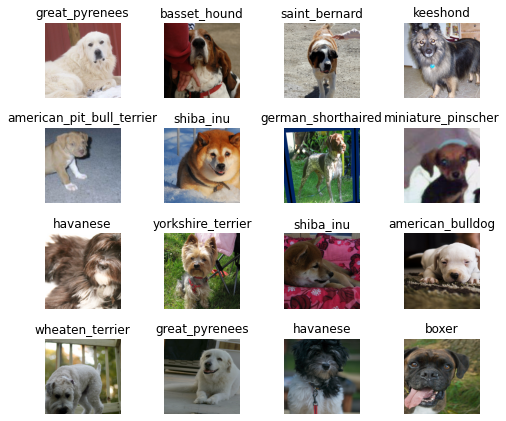

In [15]:
np.random.seed(1)
pat = r'/([^/]+)_\d+.jpg$'
data_dog = ImageDataBunch.from_name_re(path_img, fnames_dog, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data_dog.show_batch(rows=4, figsize=(7,6))

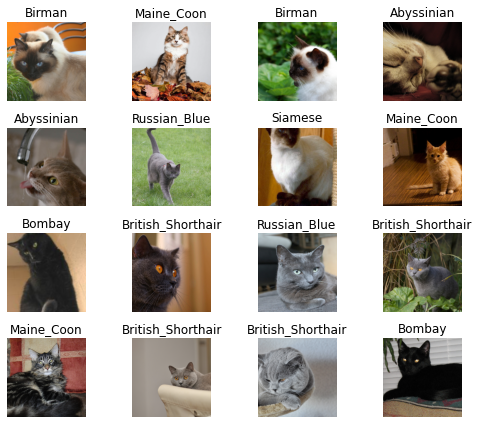

In [16]:
data_cat = ImageDataBunch.from_name_re(path_img, fnames_cat, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data_cat.show_batch(rows=4, figsize=(7,6))

## check pet breeds in two dataset

In [ ]:
print(data.classes)
len(data.classes),data.c

In [ ]:
chara_breeds = df_cat["BreedName"].values.tolist()+df_dog["BreedName"].values.tolist()
chara_breeds += df_cat["AltBreedName"].values.tolist()+df_dog["AltBreedName"].values.tolist()
print(chara_breeds)
len(chara_breeds)

In [ ]:
def check_breeds():
  chara_breeds = df_cat["BreedName"].values.tolist()+df_dog["BreedName"].values.tolist()
  chara_breeds += df_cat["AltBreedName"].values.tolist()+df_dog["AltBreedName"].values.tolist()
  missing_breed_info_count = 0
  for breed in data.classes:
    breed = breed.replace("_", " ")
    l=breed.strip().lower().split()
    breed=""
    for w in l:
      breed+=w.capitalize()+" " 
    breed = breed.strip()
    if breed not in chara_breeds:
      missing_breed_info_count+=1
      print(breed +" doesn't appear in the first dataset")
  return missing_breed_info_count
check_breeds()

German Shorthaired doesn't appear in the first dataset
Scottish Terrier doesn't appear in the first dataset


2

In [ ]:
# for breed in chara_breeds:
#   if "German" in breed:
#     print(breed)
print(df_dog[df_dog["BreedName"]=="Scottish Terrier Scottie"].loc[:,['BreedName','AltBreedName']])
print(df_dog[df_dog["BreedName"]=="German Shorthaired Pointer"].loc[:,['BreedName','AltBreedName']])

                    BreedName    AltBreedName
204  Scottish Terrier Scottie  Scotch Terrier
                      BreedName                 AltBreedName
106  German Shorthaired Pointer  German Short Haired Pointer


In [ ]:
df_dog.at[204,'AltBreedName'] = 'Scottish Terrier'
df_dog.at[106,'AltBreedName'] = 'German Shorthaired'
check_breeds()

0

We can find characteristics for all breeds in Oxford-IIIT Pet Dataset now.

# Baseline Model

In [ ]:
def flatten(x):
    return x.view(x.shape[0],-1)

class Lambda(nn.Module):
    def __init__(self,func): 
        super().__init__()
        self.func = func
        
    def forward(self,xb): return self.func(xb)

class SubRelu(nn.Module):
    def __init__(self,sub=0.4):
        super().__init__()
        self.sub = sub
    
    def forward(self,xb):
        xb = F.relu(xb)
        xb.sub_(self.sub)
        return xb

def subConv2d(ni,nf,ks=3,stride=2):
    return nn.Sequential(nn.Conv2d(ni,nf,ks,padding=ks//2,stride=stride),SubRelu())

def get_subRelu_model():
    model = nn.Sequential(
        subConv2d(3,8),
        subConv2d(8,16),
        subConv2d(16,32),
        subConv2d(32,32),
        nn.AdaptiveAvgPool2d(1),
        Lambda(flatten),
        nn.Linear(32,37),
    )
    return model

In [ ]:
model = get_subRelu_model()
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): SubRelu()
  )
  (1): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): SubRelu()
  )
  (2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): SubRelu()
  )
  (3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): SubRelu()
  )
  (4): AdaptiveAvgPool2d(output_size=1)
  (5): Lambda()
  (6): Linear(in_features=32, out_features=37, bias=True)
)

In [ ]:
def init_model(model):
    for layer in model:
        if isinstance(layer,nn.Sequential):
            nn.init.kaiming_normal_(layer[0].weight)
            layer[0].bias.detach().zero_()
init_model(model)
model[0][0].bias #check the model is initialized

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=28, bs=bs).normalize(imagenet_stats)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          224        True      
______________________________________________________________________
SubRelu              [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
SubRelu              [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
______________________________________________________________________
SubRelu              [32, 4, 4]           0          False     
______________________________________________________________________
Conv2d               [32, 2, 2]           9,248      True      
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


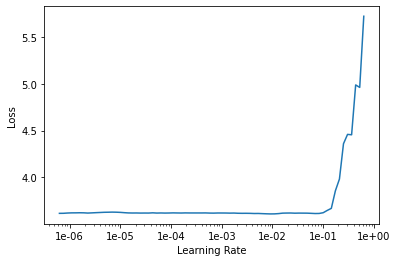

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,3.571332,3.527809,0.058863,00:42
1,3.463192,3.436971,0.078484,00:42
2,3.369462,3.332889,0.094723,00:42
3,3.255288,3.238688,0.119080,00:41
4,3.201504,3.185174,0.131935,00:41
5,3.117129,3.154966,0.143437,00:40
6,3.096688,3.125440,0.146820,00:40
7,3.051726,3.120212,0.144114,00:40


# Training: resnet50

We train the data using resnet50. The details of this model can be found in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

In [ ]:
#chrop and resize data; normalization
# data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
#                                    size=224, bs=bs).normalize(imagenet_stats)

## Cats

In [22]:
learn_cat = cnn_learner(data_cat, models.resnet50, metrics=accuracy)
learn_cat.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.129374,0.473434,0.866667,00:29
1,0.662952,0.463049,0.875000,00:29
2,0.556790,0.400383,0.866667,00:30
3,0.425129,0.354960,0.904167,00:29
4,0.324098,0.342285,0.893750,00:29
5,0.241433,0.307473,0.908333,00:29
6,0.176858,0.303544,0.914583,00:29
7,0.150256,0.295760,0.906250,00:29


In [23]:
learn_cat.save('stage-1-50-cat')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


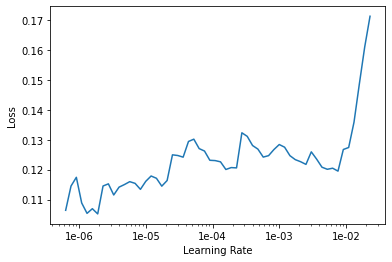

In [24]:
learn_cat.lr_find()
learn_cat.recorder.plot()

In [29]:
learn_cat.unfreeze()
learn_cat.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.156606,0.284485,0.916667,00:30
1,0.146771,0.279913,0.920833,00:30
2,0.108406,0.268643,0.920833,00:30


In [31]:
learn_cat.save('stage-2-50-cat')
learn_cat.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


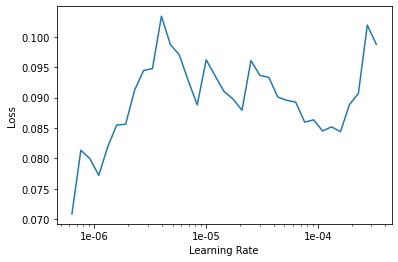

In [32]:
learn_cat.recorder.plot()

In [33]:
learn_cat.unfreeze()
learn_cat.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.911612,0.588286,0.822917,00:31


In [35]:
learn_cat.load('stage-2-50-cat');
#learn_cat.export(file = 'cat_leaner.pkl')

In [46]:
learn_cat = cnn_learner(data_cat, models.resnet34, metrics=accuracy)
learn_cat.fit_one_cycle(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.916234,0.443169,0.852083,00:28
1,0.904859,0.358417,0.887500,00:28
2,0.638465,0.368171,0.870833,00:28
3,0.475767,0.385741,0.887500,00:28
4,0.384795,0.302879,0.902083,00:28
5,0.311742,0.298364,0.893750,00:28
6,0.241179,0.298308,0.912500,00:28
7,0.218282,0.288484,0.912500,00:28


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


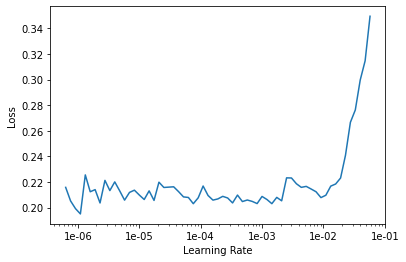

In [47]:
learn_cat.save('stage-1-34-cat')
learn_cat.lr_find()
learn_cat.recorder.plot()

In [51]:
learn_cat.load('stage-1-34-cat');
learn_cat.unfreeze()
learn_cat.fit_one_cycle(5,max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.217634,0.251602,0.925000,00:29
1,0.190018,0.268568,0.912500,00:29
2,0.177392,0.259779,0.916667,00:28
3,0.122951,0.262082,0.920833,00:28
4,0.107041,0.269156,0.920833,00:28


In [53]:
learn_cat.save('stage-2-34-cat')

## Dogs

In [64]:
# download pre-trained weights
learn_dog = cnn_learner(data_dog, models.resnet50, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


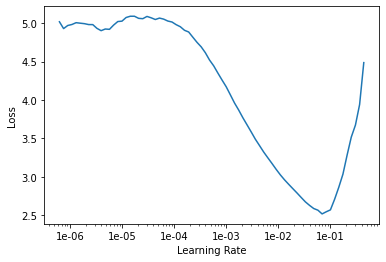

In [66]:
learn_dog.lr_find()
learn_dog.recorder.plot()

In [67]:
learn_dog.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.697117,0.213528,0.919840,01:01
1,0.441007,0.265068,0.922846,01:02
2,0.393988,0.270923,0.921844,01:02
3,0.325772,0.209365,0.941884,01:03
4,0.279441,0.201429,0.932866,01:03
5,0.202294,0.158522,0.950902,01:03
6,0.156578,0.167245,0.949900,01:03
7,0.134256,0.149121,0.957916,01:03
8,0.103928,0.147401,0.949900,01:04
9,0.106737,0.143338,0.953908,01:04


In [68]:
learn_dog.save('stage-1-50-dog')
# learn_dog.load('stage-1-34-cat');
# learn_dog.unfreeze()
# learn_dog.fit_one_cycle(3)

## Data augmentation

2


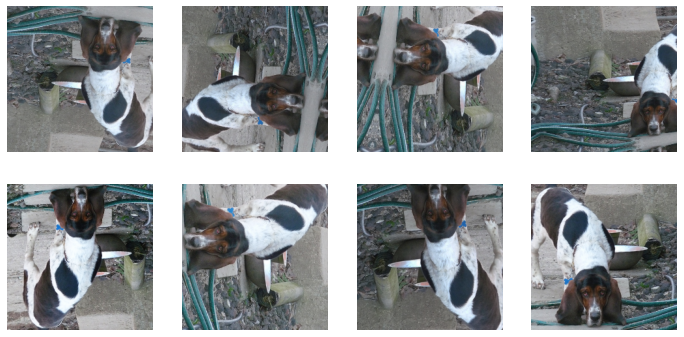

In [55]:
# Data augmentation: https://docs.fast.ai/vision.transform.html
tfms = get_transforms(flip_vert=True)
print(len(tfms))
def get_ex(): return open_image('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_5.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
plots_f(2, 4, 12, 6, size=224)

In [59]:
data_aug_dog = ImageDataBunch.from_name_re(path_img, fnames_dog, pat, ds_tfms=get_transforms(flip_vert=True),
                                    size=224, bs=bs).normalize(imagenet_stats)
learn_aug_dog = cnn_learner(data_aug_dog, models.resnet50, metrics=accuracy)           
learn_aug_dog.fit_one_cycle(10)                         

epoch,train_loss,valid_loss,accuracy,time
0,1.466729,0.232835,0.918838,00:58
1,1.052965,0.383103,0.880762,00:58
2,0.813653,0.212817,0.928858,00:59
3,0.737741,0.192319,0.935872,00:59
4,0.576535,0.164312,0.942886,01:00
5,0.537998,0.197868,0.926854,01:00
6,0.443599,0.169393,0.932866,01:01
7,0.362830,0.144214,0.947896,01:01
8,0.316431,0.142073,0.950902,01:01
9,0.288872,0.138460,0.954910,01:01


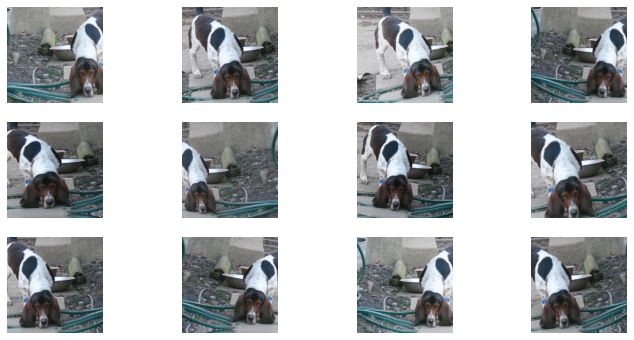

In [62]:
tfms = get_transforms()
plots_f(3, 4, 12, 6, size=224)

# Results

In [70]:
interp_cat = ClassificationInterpretation.from_learner(learn_cat)

losses,idxs = interp_cat.top_losses()

len(data_cat.valid_ds)==len(losses)==len(idxs)

True

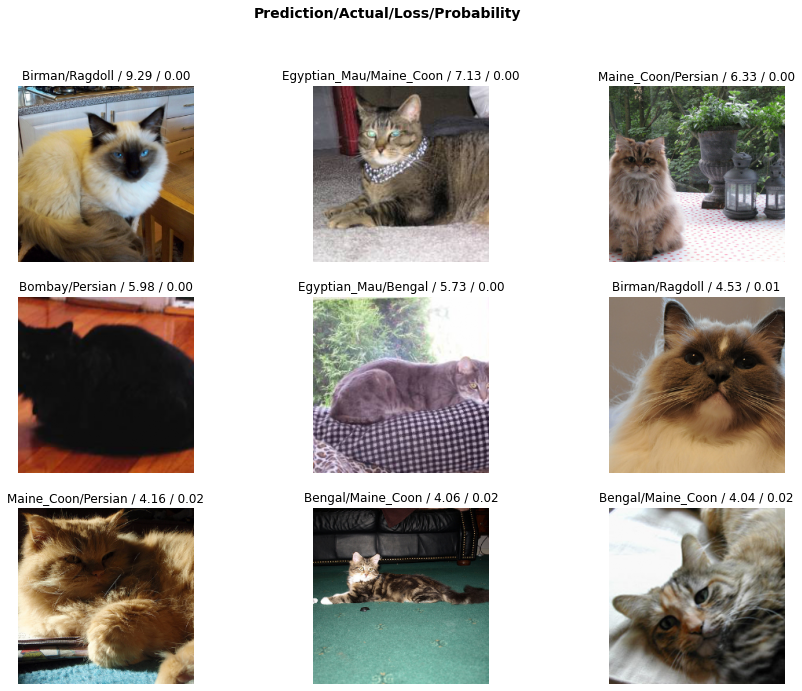

In [71]:
interp_cat.plot_top_losses(9, figsize=(15,11))

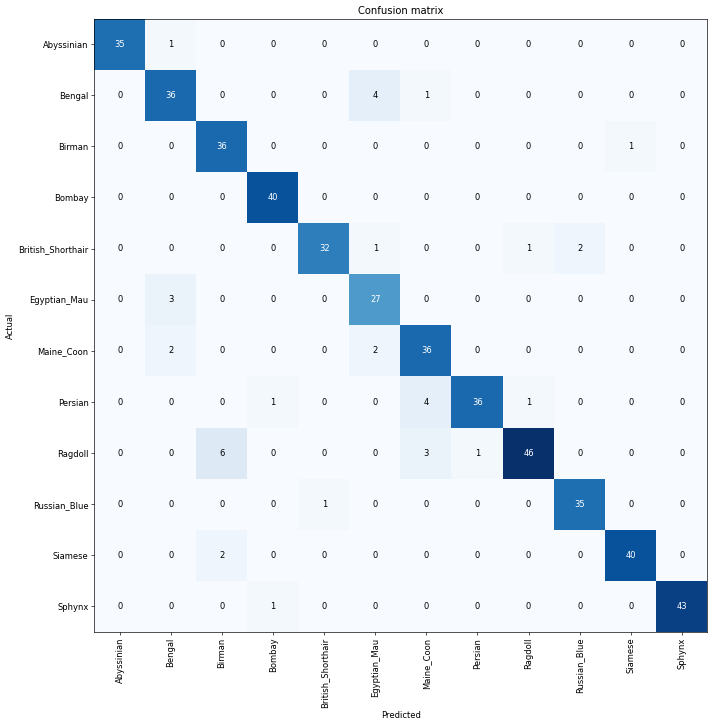

In [72]:
interp_cat.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [73]:
interp_cat.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Persian', 'Maine_Coon', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Maine_Coon', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Maine_Coon', 'Egyptian_Mau', 2),
 ('Siamese', 'Birman', 2)]

In [113]:
interp_dog = ClassificationInterpretation.from_learner(learn_dog)

losses,idxs = interp.top_losses()

len(data_dog.valid_ds)==len(losses)==len(idxs)

True

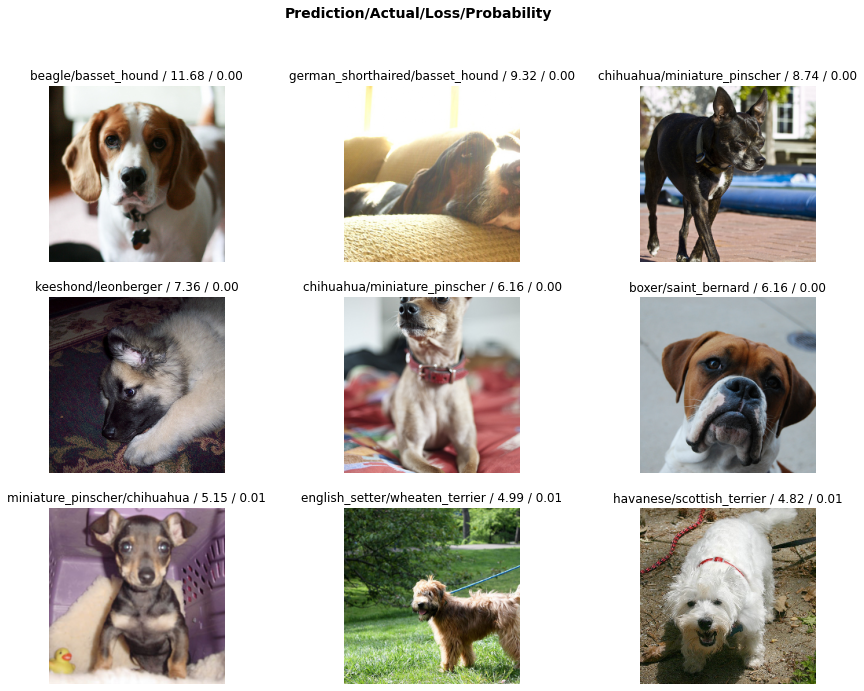

In [114]:
interp_dog.plot_top_losses(9, figsize=(15,11))

In [115]:
doc(interp.plot_top_losses)

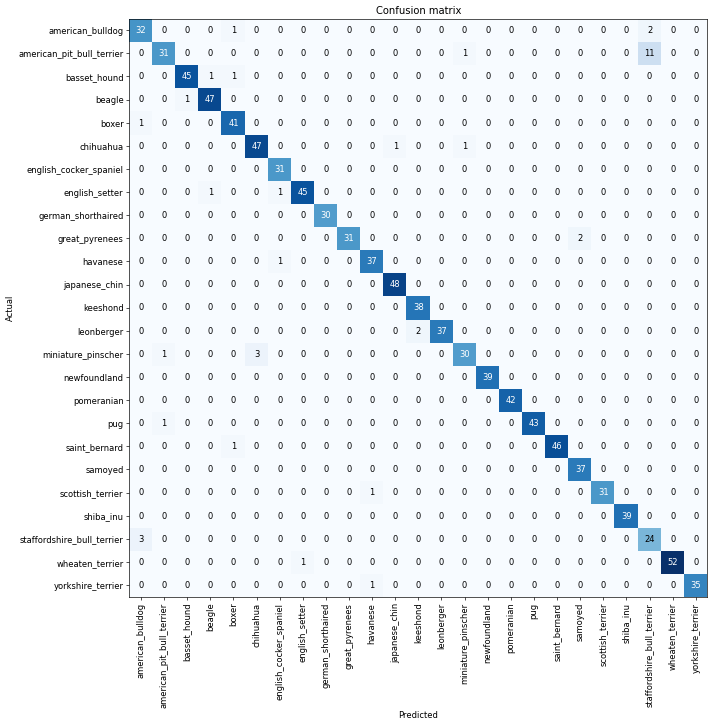

In [116]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [117]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('leonberger', 'keeshond', 2)]

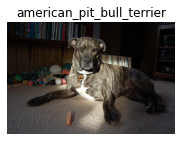

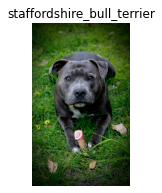

In [ ]:
img1= open_image('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_1.jpg')
img2= open_image('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_1.jpg')
# img[2] = open_image('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_1.jpg')
# img[3] = open_image('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_1.jpg')
# img[4] = open_image('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_1.jpg')
# img[5] = open_image('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_1.jpg')
#_,axs = plt.subplots(1,2,figsize=(12,4))
img1.show( title='american_pit_bull_terrier')
img2.show( title='staffordshire_bull_terrier')

# Get predictions

In [334]:
learn_dog.load('stage-1-50-dog');
def predict_dog(img_path):
  test_img =  open_image(img_path)
  test_img.show()
  prob = float(torch.max(learn_dog.predict(test_img)[2]))

  # cat_prob = float(torch.max(learn_cat.predict(test_img)[2]))
  # if cat_prob>0.99:
  #   #print(cat_prob)
  #   print("IS IT A CAT?")
  #   return 0
  # if prob<0.4:
  #   print("cannot find a dog")
  #   return 0
  if prob<0.99:
    p_matrix=learn_dog.predict(test_img)[2]
    top3=tf.math.top_k(p_matrix, k=3, sorted=True, name=None)
    print(data_dog.classes[top3.indices.numpy()[0]], r.values.numpy()[0])
    print(data_dog.classes[top3.indices.numpy()[1]], r.values.numpy()[1])
    print(data_dog.classes[top3.indices.numpy()[2]], r.values.numpy()[2])
    return [data_dog.classes[top3.indices.numpy()[0]],data_dog.classes[top3.indices.numpy()[1]],data_dog.classes[top3.indices.numpy()[2]]]
  
  #learn.load('stage-1-50');
  breed_idx = int(learn_dog.predict(test_img)[0])
  print(data_dog.classes[breed_idx])
  return [data_dog.classes[breed_idx]]

def predict_cat(img_path):
  test_img =  open_image(img_path)
  test_img.show()
  prob = float(torch.max(learn_cat.predict(test_img)[2]))

  if prob<0.99:
    p_matrix=learn_cat.predict(test_img)[2]
    top3=tf.math.top_k(p_matrix, k=3, sorted=True, name=None)
    print(data_cat.classes[top3.indices.numpy()[0]], r.values.numpy()[0])
    print(data_cat.classes[top3.indices.numpy()[1]], r.values.numpy()[1])
    print(data_cat.classes[top3.indices.numpy()[2]], r.values.numpy()[2])
    return [data_cat.classes[top3.indices.numpy()[0]],data_cat.classes[top3.indices.numpy()[1]],data_cat.classes[top3.indices.numpy()[2]]]
  
  #learn.load('stage-1-50');
  breed_idx = int(learn_cat.predict(test_img)[0])
  print(data_cat.classes[breed_idx])
  return [data_cat.classes[breed_idx]]

def predict_dog_prob(img_path):
    test_img =  open_image(img_path)
    prob = torch.max(learn_dog.predict(test_img)[2])
    return float(prob)

In [ ]:
min_prob = 1
for i in range(len(fnames_dog)):
  img=fnames_dog[i]
  if predict_dog_prob(img)<min_prob:
    print(min_prob,i)
    min_prob = predict_dog_prob(img)
print(min_prob)


## when the picture of dog is hard to tell the breed,
we give three predictions

In [330]:
from google.colab import files
uploaded = files.upload()

Saving Screen Shot 2020-07-10 at 12.07.51 AM.png to Screen Shot 2020-07-10 at 12.07.51 AM.png


staffordshire_bull_terrier 0.5250014
american_bulldog 0.41594052
american_pit_bull_terrier 0.054218434


['staffordshire_bull_terrier', 'american_bulldog', 'american_pit_bull_terrier']

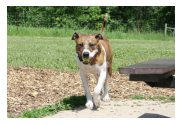

In [311]:
predict_dog(fnames_dog[379])#278,379,552

english_cocker_spaniel 0.5250014
english_setter 0.41594052
american_pit_bull_terrier 0.054218434


['english_cocker_spaniel', 'english_setter', 'american_pit_bull_terrier']

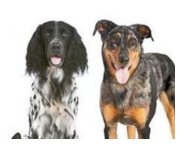

In [315]:
predict_dog(fnames_dog[3]) 

### upload your image (get breed prediction and information)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screen Shot 2020-06-28 at 2.58.37 AM.png to Screen Shot 2020-06-28 at 2.58.37 AM.png


Ragdoll


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


'Ragdoll'

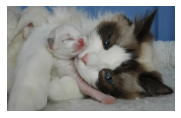

In [ ]:
predict_breed('/content/Screen Shot 2020-06-28 at 2.58.37 AM.png')

Ragdoll


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


,47
BreedName,Ragdoll
AltBreedName,NaN
Fur,Long
MaleWtKg,7
Temperment,"Affectioante, Friendly, Gentle, Quiet, Easygoing"
AvgKittenPrice,1000
PopularityUS2017,4


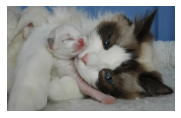

In [ ]:
infoTable(df_cat,predict_breed('/content/Screen Shot 2020-06-28 at 2.58.37 AM.png'))